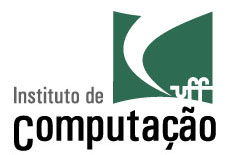



---


# **Biological Image and Signal Processing**
### **Presenting new Features based on Image Processing for Voice Emotion Recognition**

**Professor**: Aura Conci

**Student**: Marcelo Marques da Rocha

## **Week 01 - Design a Possible Solution** (April 27th)
What are the next steps related to do?

* Features Computation (**why** the features are **chosen**?)
* **Steps** that will be follow in the **processing phase**...
* **What** is considered a **solution** for the initial problem?
* What is the **input**?
* How is the **output**?
* **How** will be the **evaluation** of the solution?
* **What** will be the **computational tools** to be used ?


## **Week 02 - Solving the Problem** (May 04th)


### **Importando as bibliotecas**

In [40]:
# Import libraries 
import cv2
from google.colab.patches import cv2_imshow
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import specgram
import pandas as pd
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings

import sklearn
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### **Acessando o Dataset no Drive**



In [ ]:
# from google.colab import auth
# auth.authenticate_user()
# from googleapiclient.discovery import build
# drive_service = build('drive', 'v3')

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Using a reduced version of TESS (*Toronto Emotional Speech Set*) Dataset** ([https://tspace.library.utoronto.ca/handle/1807/24487](https://tspace.library.utoronto.ca/handle/1807/24487))

Foram mantidas no dataset as emoções:
- **Angry** (200 frases)
- **Happy** (200 frases)
- **Neutral** (200 frases)
- **Sad** (200 frases)

São duas pastas **YOUNG** e **OLD**, com quatro pastas contendo 200 amostras de cada emoção com a voz de uma atriz jovem (*26 years old*) e outra atriz mais velha (*64 years old*).

### **Configuração dos paths das pastas das amostras (YOUNG)**

In [42]:
# Using the TESS dataset (reduced) - Young voice
young_path_SPECS = '/content/drive/MyDrive/TESS/young_SPECS_0_to_192Hz/'
dir_SPECS_young = os.listdir(young_path_SPECS) 
dir_SPECS_young.sort()

path_TESS = '/content/drive/MyDrive/TESS/'
path_young_angry = path_TESS + 'young/angry/'
dir_young_angry = os.listdir(path_young_angry) 
dir_young_angry.sort()

path_young_happy = path_TESS + 'young/happy/'
dir_young_happy = os.listdir(path_young_happy)
dir_young_happy.sort()

path_young_neutral = path_TESS + 'young/neutral/'
dir_young_neutral = os.listdir(path_young_neutral)
dir_young_neutral.sort()

path_young_sad = path_TESS + 'young/sad/'
dir_young_sad = os.listdir(path_young_sad)
dir_young_sad.sort()

print("Emotion (Type) - Young voice\tTotal")
print("======================================")
print("Angry\t\t\t\t", len(dir_young_angry))
print("Happy\t\t\t\t", len(dir_young_happy))
print("Neutral\t\t\t\t", len(dir_young_neutral))
print("Sad\t\t\t\t", len(dir_young_sad))
print("Young folder:", len(dir_SPECS_young))

Emotion (Type) - Young voice	Total
Angry				 200
Happy				 200
Neutral				 200
Sad				 200
Young folder: 800


### **Configuração dos paths das pastas das amostras (OLD)**

In [43]:
# Using the TESS dataset (reduced) - OLD voice
old_path_SPECS = '/content/drive/MyDrive/TESS/old_SPECS_0_to_192Hz/'
dir_SPECS_old = os.listdir(old_path_SPECS) 
dir_SPECS_old.sort()

path_TESS = '/content/drive/MyDrive/TESS/'
path_old_angry = path_TESS + 'old/angry/'
dir_old_angry = os.listdir(path_old_angry) 
dir_old_angry.sort()

path_old_happy = path_TESS + 'old/happy/'
dir_old_happy = os.listdir(path_old_happy)
dir_old_happy.sort()

path_old_neutral = path_TESS + 'old/neutral/'
dir_old_neutral = os.listdir(path_old_neutral)
dir_old_neutral.sort()

path_old_sad = path_TESS + 'old/sad/'
dir_old_sad = os.listdir(path_old_sad)
dir_old_sad.sort()

print("Emotion (Type) - Old voice\tTotal")
print("======================================")
print("Angry\t\t\t\t", len(dir_old_angry))
print("Happy\t\t\t\t", len(dir_old_happy))
print("Neutral\t\t\t\t", len(dir_old_neutral))
print("Sad\t\t\t\t", len(dir_old_sad))

print("Old folder:", len(dir_SPECS_old))

Emotion (Type) - Old voice	Total
Angry				 200
Happy				 200
Neutral				 200
Sad				 200
Old folder: 800


### **Configuração dos paths das pastas das amostras do ator DC**

In [ ]:
# dataset SAVEE - ator DC

dc_path_SPECS = '/content/drive/MyDrive/dc/dc_SPECS_0_to_192Hz/'
dir_SPECS_dc = os.listdir(dc_path_SPECS) 
dir_SPECS_dc.sort()

path_dc = '/content/drive/MyDrive/dc/'
path_dc_angry = path_dc + 'angry/'
dir_dc_angry = os.listdir(path_dc_angry) 
dir_dc_angry.sort()

path_dc_happy = path_dc + 'happy/'
dir_dc_happy = os.listdir(path_dc_happy)
dir_dc_happy.sort()

path_dc_neutral = path_dc + 'neutral/'
dir_dc_neutral = os.listdir(path_dc_neutral)
dir_dc_neutral.sort()

path_dc_sad = path_dc + 'sad/'
dir_dc_sad = os.listdir(path_dc_sad)
dir_dc_sad.sort()

print("Emotion (Type) - Old voice\tTotal")
print("======================================")
print("Angry\t\t\t\t", len(dir_dc_angry))
print("Happy\t\t\t\t", len(dir_dc_happy))
print("Neutral\t\t\t\t", len(dir_dc_neutral))
print("Sad\t\t\t\t", len(dir_dc_sad))

print("dc folder:", len(dir_SPECS_dc))

Emotion (Type) - Old voice	Total
Angry				 60
Happy				 60
Neutral				 60
Sad				 60
dc folder: 240


### **Funções de Processamento**

In [44]:
# definindo contantes
SAMPLE_RATE = 44100

#### **Função que plota a amostra no domínio do Tempo**



In [ ]:
def plota(age, emotion, word):
  if age == "young":
    prefix = "YAF_"
  else:
    prefix = "OAF_"

  fname = path_TESS + age + '/' + emotion + '/' + prefix + word + '_' + emotion + '.wav'
  data, sampling_rate = librosa.load(fname, sr=SAMPLE_RATE)
  plt.figure(figsize=(15, 5))
  plt.title(fname)
  librosa.display.waveplot(data, sr=sampling_rate)
  return fname

 

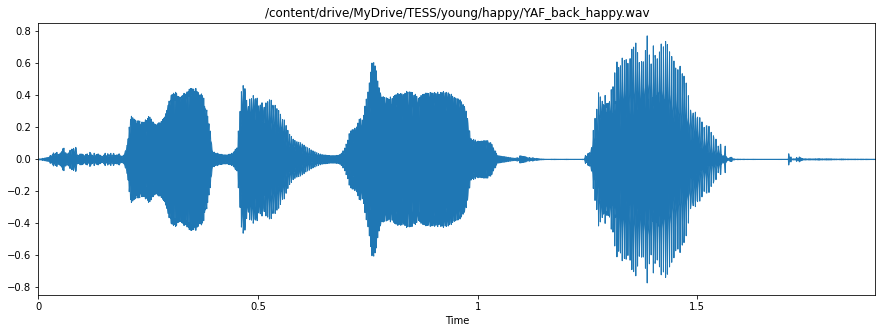

In [ ]:
# exemplo
file = plota("young", "happy", "back")

In [ ]:
print(file)
ipd.Audio(file)

/content/drive/MyDrive/TESS/young/happy/YAF_back_happy.wav


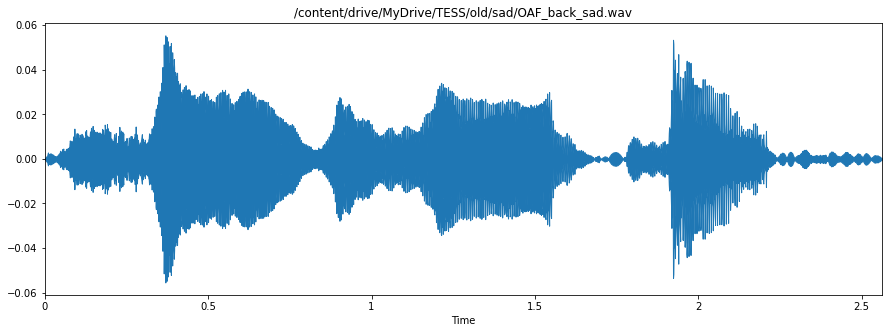

In [ ]:
# exemplo
file = plota("old", "sad", "back")

In [ ]:
print(file)
ipd.Audio(file)

/content/drive/MyDrive/TESS/old/sad/OAF_back_sad.wav


#### **Função que plota o Spectrograma MFCC da amostra (PRECISA DE AJUSTE PARA OLD VOICE**

In [ ]:
def plota_mfcc(emotion, word):
  fname = path_TESS + emotion + '/' + 'YAF_' + word + '_' + emotion + '.wav'
  y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5) # Chop audio at 5 secs... 
  mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 5) # 20 MFCC components

  plt.figure(figsize=(15, 15))
  plt.subplot(3,1,1)
  librosa.display.specshow(mfcc)
  plt.ylabel('MFCC')
  plt.title(fname)
  plt.colorbar()
  return fname

#### **Função que plota duas séries temporais no mesmo gráfico**

In [ ]:
def plota_duas_series(val1, lab1, val2, lab2):
  plt.figure(figsize=(20, 15))
  plt.subplot(3,1,1)
  plt.plot(val1, label=lab1)
  plt.plot(val2, label=lab2)
  plt.legend()

#### **Função que plota a amostra (YOUNG voice) no domínio da frequência usando a STFT (Short-Time Fourrier Transform)**

In [45]:
def plota_stft_young(emotion, word, y_type='linear', title=True, file_name=None):
  if file_name == None:
    fname = path_TESS + "young/" + emotion + '/' + 'YAF_' + word + '_' + emotion + '.wav'
  else:
    fname = path_TESS + "young/" + emotion + '/' + file_name
    pos = []
    for l in range(len(fname)):
      if fname[l] == "_":
        pos.append(l)
    word = fname[pos[0]+1 : pos[1]]
    print("Word:", word)

  y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5) # Chop audio at 5 secs...
  S = np.abs(librosa.stft(y))
  fig, ax = plt.subplots()
  img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis=y_type, x_axis='time', ax=ax)
  if title:
    ax.set_title('Power spectrogram: ' + fname)
    fig.colorbar(img, ax=ax, format="%+2.0f dB")
  plt.savefig('SPEC_' + word + '_' + emotion + '.png', format='png')
  return 'SPEC_' + word + '_' + emotion + '.png'


'SPEC_hate_sad.png'

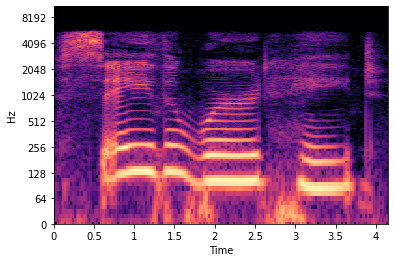

In [46]:
plota_stft_young("sad", "hate", "log", False)

#### **Função que plota a amostra (OLD voice) no domínio da frequência usando a STFT (Short-Time Fourrier Transform)**

In [47]:
def plota_stft_old(emotion, word, y_type='linear', title=True, file_name=None):
  if file_name == None:
    fname = path_TESS + "old/" + emotion + '/' + 'OAF_' + word + '_' + emotion + '.wav'
  else:
    fname = path_TESS + "old/" + emotion + '/' + file_name
    pos = []
    for l in range(len(fname)):
      if fname[l] == "_":
        pos.append(l)
    word = fname[pos[0]+1 : pos[1]]
    print("Word:", word)

  y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5) # Chop audio at 5 secs...
  S = np.abs(librosa.stft(y))
  fig, ax = plt.subplots()
  img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis=y_type, x_axis='time', ax=ax)
  if title:
    ax.set_title('Power spectrogram: ' + fname)
    fig.colorbar(img, ax=ax, format="%+2.0f dB")
  plt.savefig('SPEC_' + word + '_' + emotion + '.png', format='png')
  return 'SPEC_' + word + '_' + emotion + '.png'

'SPEC_hate_neutral.png'

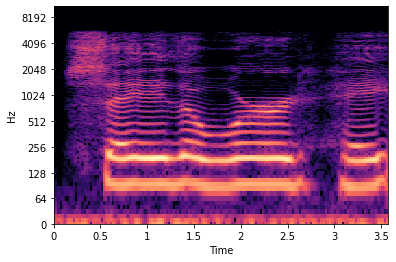

In [48]:
plota_stft_old("neutral", "hate", "log", False)

#### **Função que plota a amostra (DC voice) no domínio da frequência usando a STFT (Short-Time Fourrier Transform)**

In [ ]:
def plota_stft_dc(emotion, word, y_type='linear', title=True, file_name=None):
  if emotion == "angry":
    prefixo = "a"
  elif emotion == "happy":
    prefixo = "h"
  elif emotion == "neutral":
    prefixo = "n"
  elif emotion == "sad":
    prefixo = "sa"

  if file_name == None:
    fname = path_dc + emotion + '/' + prefixo + word + '.wav'
  else:
    fname = path_dc + emotion + '/' + file_name
    print("fname => ", fname)


  y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5) # Chop audio at 5 secs...
  S = np.abs(librosa.stft(y))
  fig, ax = plt.subplots()
  img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis=y_type, x_axis='time', ax=ax)
  if title:
    ax.set_title('Power spectrogram: ' + fname)
    fig.colorbar(img, ax=ax, format="%+2.0f dB")
  print("File name:", file_name)
  plt.savefig('SPEC_' + file_name[0:-4] + '_' + emotion + '.png', format='png')
  return 'SPEC_' + file_name[0:-4] + '_' + emotion + '.png'

fname =>  /content/drive/MyDrive/dc/neutral/n01.wav
File name: n01.wav


'SPEC_n01_neutral.png'

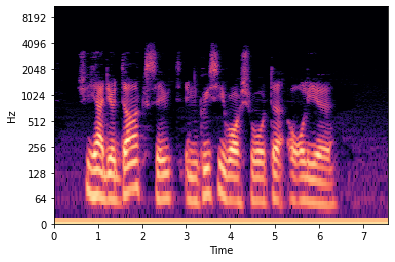

In [ ]:
plota_stft_dc("neutral", "", "log", False, "n01.wav")

#### **Função que seleciona a ROI da Imagem e a salva no drive**

In [49]:
def selec_roi(path_grafico_completo):
  # fname = path_TESS + emotion + '/' + 'YAF_' + word + '_' + emotion + '.wav'
  # y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5) # Chop audio at 5 secs...
  # S = np.abs(librosa.stft(y))

  fig, ax = plt.subplots()
  # img_stft = cv2.imread("teste.png")
  # color = ('b', 'g', 'r')
  # for i, col in enumerate(color):
  #   hist = cv2.calcHist([img_stft], [i], None, [256], [0, 256])
    #plt.plot(hist, color = col)
    #plt.xlim([0, 256])
    #cv2_imshow(img_stft)
  img_array=plt.imread(path_grafico_completo)[185:252,55:390]
  #img_array=plt.imread(path_grafico_completo)[100:180,55:390] um teste sobre o dataset SAVEE
  plt.axis('off')
  plt.imshow(img_array)
  plt.savefig(path_grafico_completo, format='png')
  print(path_grafico_completo)

  

#### **Função que calcula a média das distâncias....**

In [ ]:
# Source - TESS; Gender - Female;
def compara_emocoes(emotion1, emotion2):
  fname1 = path_TESS + emotion1 + '/' + 'YAF_back_' + emotion1 + '.wav'
  X, sample_rate = librosa.load(fname1, res_type='kaiser_fast',duration=2.5,sr=44100,offset=0.5)  
  emotion1_mfcc = librosa.feature.mfcc(y=X, sr=SAMPLE_RATE, n_mfcc=13)
  emotion1_mean = np.mean(emotion1_mfcc, axis=0)
  #print(len(emotion1_mean), emotion1_mean.shape)

  # Source - TESS; Gender - Female;  
  fname2 = path_TESS + emotion2 + '/' + 'YAF_back_' + emotion2 + '.wav'
  X, sample_rate = librosa.load(fname2, res_type='kaiser_fast',duration=2.5,sr=44100,offset=0.5)  
  emotion2_mfcc = librosa.feature.mfcc(y=X, sr=SAMPLE_RATE, n_mfcc=13)
  emotion2_mean = np.mean(emotion2_mfcc, axis=0)

  #print(len(emotion2_mean), emotion2_mean.shape)

  print("Comparando: ", fname1, " e", fname2 )

  #for i in range(len(emotion2_mean)-5): # Deslocamento para ajustar as series temporais
  # emotion2_mean[i] = emotion2_mean[i+5]

  dist_sum = 0

  interval = min(len(emotion1_mean), len(emotion2_mean))

  distancias = []

  for i in range(interval):
    distancias.append((abs(emotion1_mean[i] - emotion2_mean[i])))

  dist_media = np.mean(distancias)
  dist_dp = np.std(distancias)
  dist_mediana = np.median(distancias)
  dist_var = np.var(distancias)
  print("Dist média:", dist_media, "Desvio padrão:", dist_dp, "Mediana:", dist_mediana, "Variancia", dist_var)

  return emotion1_mean, emotion1, emotion2_mean, emotion2, fname1, fname2

In [ ]:
em1_mean, em1, em2_mean, em2, fname1, fname2 = compara_emocoes("sad", "neutral")

Comparando:  /content/drive/MyDrive/TESS/sad/YAF_back_sad.wav  e /content/drive/MyDrive/TESS/neutral/YAF_back_neutral.wav
Dist média: 7.5494146 Desvio padrão: 4.983345 Mediana: 6.155802 Variancia 24.833729


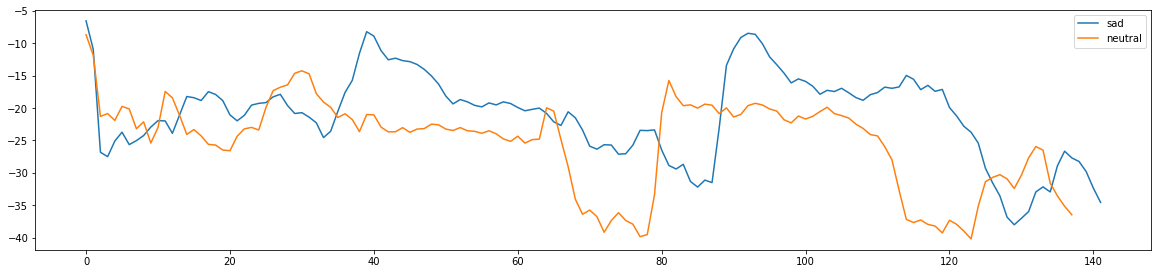

In [ ]:
plota_duas_series(em1_mean, em1, em2_mean, em2)

#### **Função que mostra histograma dos canais (RGB) selecionados da imagem**

In [50]:
def mostra_hist(age, img, canal):
  print("voice: ", age, " imagem: ", img, " canal: ", canal)
  if age == "young":
    img_spec = cv2.imread('/content/drive/MyDrive/TESS/young_SPECS_0_to_192Hz/' + img)
  elif age == "old":
    img_spec = cv2.imread('/content/drive/MyDrive/TESS/old_SPECS_0_to_192Hz/' + img)
  elif age == "dc":
    img_spec = cv2.imread('/content/drive/MyDrive/dc/dc_SPECS_0_to_192Hz/' + img)

  pixels_canal_b = [] # pixels do canal blue:0
  pixels_canal_g = [] # pixels do canal green:1
  pixels_canal_r = [] # pixels do canal red:2

  for x in range(54, 389 ): # seleciona a regiao de interesse da imagem
    for y in range(110, 177):
      pixels_canal_b.append(img_spec[y, x, 0]) # extrai os pixels do canal blue e coloca na lista

  for x in range(54, 389 ): # seleciona a regiao de interesse da imagem
    for y in range(110, 177):
      pixels_canal_g.append(img_spec[y, x, 1]) # extrai os pixels do canal green e coloca na lista

  for x in range(54, 389 ): # seleciona a regiao de interesse da imagem
    for y in range(110, 177):
      pixels_canal_r.append(img_spec[y, x, 2]) # extrai os pixels do canal red e coloca na lista

  #plt.ylim(0, 1000)
  if 'b' in canal.lower(): sns.histplot(np.array(pixels_canal_b), bins=256, color="blue", binwidth=1)
  if 'g' in canal.lower(): sns.histplot(np.array(pixels_canal_g), bins=256, color="green", binwidth=1)
  if 'r' in canal.lower(): sns.histplot(np.array(pixels_canal_r), bins=256, color="red", binwidth=1)


### **Demonstrando os uso de algumas funções de processamento**

#### **Gerando os Spectrogramas (STFT) das quatro emoções com a palavra "hate"**

'SPEC_hate_neutral.png'

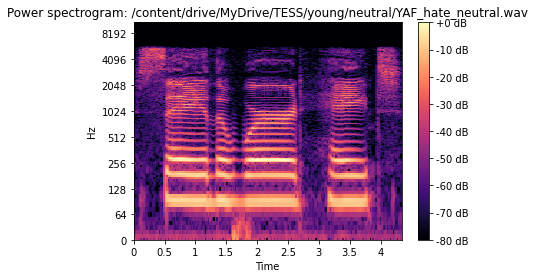

In [ ]:
plota_stft_young("neutral", "hate", "log")

'SPEC_hate_sad.png'

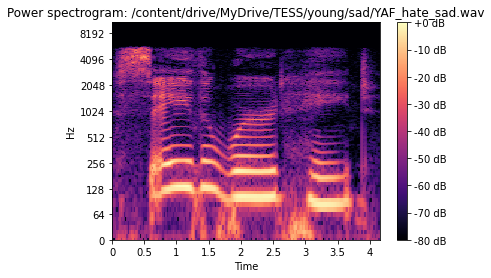

In [ ]:
plota_stft_young("sad", "hate",  "log")

'SPEC_hate_happy.png'

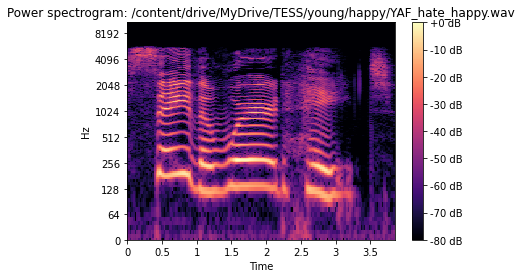

In [ ]:
plota_stft_young("happy", "hate", "log")

'SPEC_hate_angry.png'

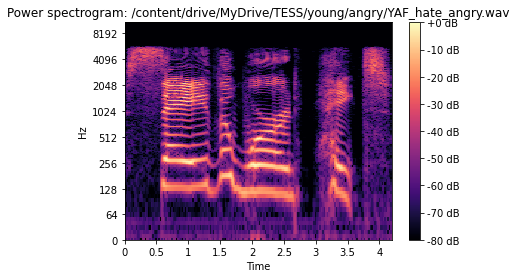

In [ ]:
plota_stft_young("angry", "hate", "log")

#### **Gerando os Spectrogramas (MFCC) das quatro emoções com a palavra "hate"**

'/content/drive/MyDrive/TESS/neutral/YAF_hate_neutral.wav'

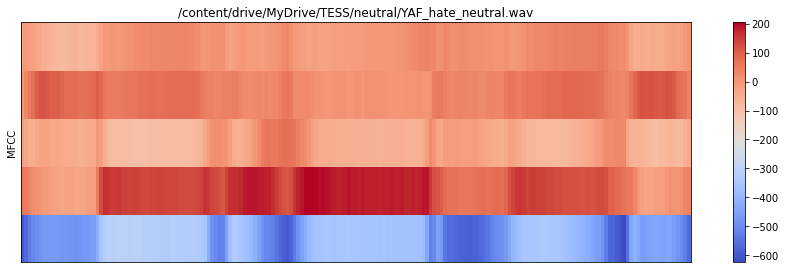

In [ ]:
plota_mfcc("neutral", "hate")

'/content/drive/MyDrive/TESS/sad/YAF_hate_sad.wav'

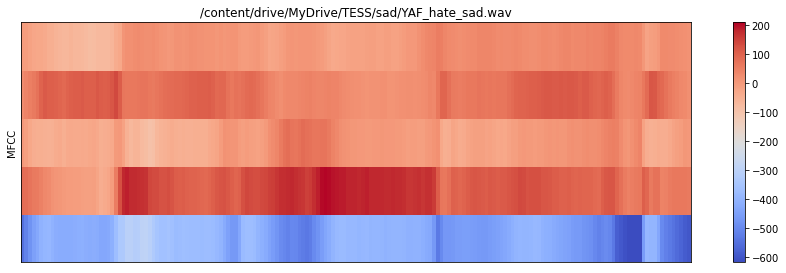

In [ ]:
plota_mfcc("sad", "hate")

'/content/drive/MyDrive/TESS/happy/YAF_hate_happy.wav'

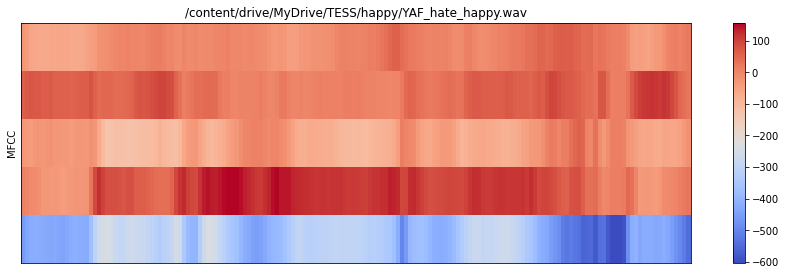

In [ ]:
plota_mfcc("happy", "hate")

'/content/drive/MyDrive/TESS/angry/YAF_hate_angry.wav'

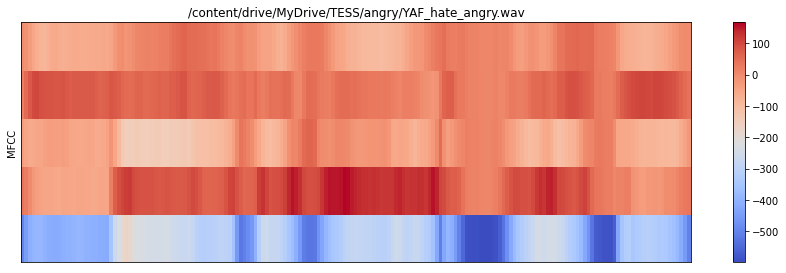

In [ ]:
plota_mfcc("angry", "hate")

### **Histograma dos canais RGB das imagens dos spectrogramas das emoções: *Angry*, *Happy*, *Neutral* e *Sad***

voice:  young  imagem:  SPEC_back_angry.png  canal:  r


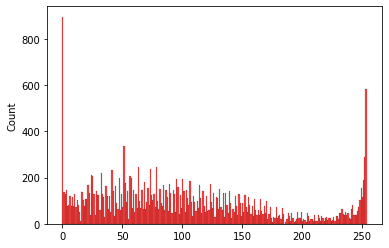

In [ ]:
mostra_hist("young", dir_SPECS_young[0], 'r')

voice:  young  imagem:  SPEC_back_angry.png  canal:  g


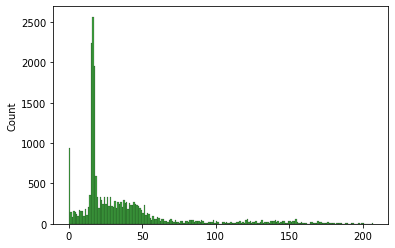

In [ ]:
mostra_hist("young", dir_SPECS_young[0], 'g')

voice:  young  imagem:  SPEC_back_angry.png  canal:  b


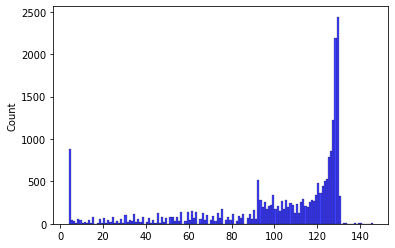

In [ ]:
mostra_hist("young", dir_SPECS_young[0], 'b')

voice:  young  imagem:  SPEC_back_angry.png  canal:  rgb


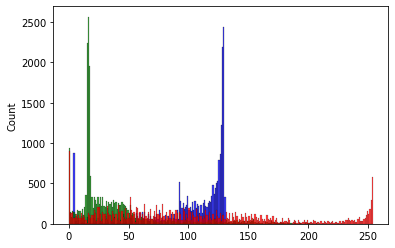

In [ ]:
mostra_hist("young", dir_SPECS_young[0], 'rgb')

### **(NÃO RODAR) Etapas 1 e 2 - Gerando os Spectrogramas e selecionando a região de interesse que é de 0Hz à 192Hz**

#### **Gerando os Spectrogramas da emoção SAD (Young, Old e DC) já com a região de interesse selecionada**

In [ ]:
# # para Young voice
# for i in range(len(dir_young_sad)):
#   selec_roi(plota_stft_young("sad", "", "log", False, dir_young_sad[i]))
#   print(dir_young_sad[i])

# #copiando arquivos para o drive
# !cp /content/*.* /content/drive/MyDrive/TESS/young_SPECS_0_to_192Hz/
# #removendo arquivos
# !rm *.*

# # para Old voice
# for i in range(len(dir_old_sad)):
#   selec_roi(plota_stft_old("sad", "", "log", False, dir_old_sad[i]))
#   print(dir_old_sad[i])

# #copiando arquivos para o drive
# !cp /content/*.* /content/drive/MyDrive/TESS/old_SPECS_0_to_192Hz/
# #removendo arquivos
# !rm *.*

# para DC voice
for i in range(len(dir_dc_sad)):
  selec_roi(plota_stft_dc("sad", "", "log", False, dir_dc_sad[i]))
  print(dir_dc_sad[i])

#copiando arquivos para o drive
!cp /content/*.* /content/drive/MyDrive/dc/dc_SPECS_0_to_192Hz/
#removendo arquivos
!rm *.*

#### **Gerando os Spectrogramas da emoção ANGRY (Young, Old e DC) já com a região de interesse selecionada**


In [ ]:
# # para Young voice
# for i in range(len(dir_young_angry)):
#   selec_roi(plota_stft_young("angry", "", "log", False, dir_young_angry[i]))
#   print(dir_young_angry[i])

# #copiando arquivos para o drive
# !cp /content/*.* /content/drive/MyDrive/TESS/young_SPECS_0_to_192Hz/
# #removendo arquivos
# !rm *.*

# # para Old voice
# for i in range(len(dir_old_angry)):
#   selec_roi(plota_stft_old("angry", "", "log", False, dir_old_angry[i]))
#   print(dir_old_angry[i])

# #copiando arquivos para o drive
# !cp /content/*.* /content/drive/MyDrive/TESS/old_SPECS_0_to_192Hz/
# #removendo arquivos
# !rm *.*

# para DC voice
for i in range(len(dir_dc_angry)):
  selec_roi(plota_stft_dc("angry", "", "log", False, dir_dc_angry[i]))
  print(dir_dc_angry[i])

#copiando arquivos para o drive
!cp /content/*.* /content/drive/MyDrive/dc/dc_SPECS_0_to_192Hz/
#removendo arquivos
!rm *.*


#### **Gerando os Spectrogramas da emoção NEUTRAL (Young, Old e DC) já com a região de interesse selecionada**


In [ ]:
# # para Young voice
# for i in range(len(dir_young_neutral)):
#   selec_roi(plota_stft_young("neutral", "", "log", False, dir_young_neutral[i]))
#   print(dir_young_neutral[i])

# #copiando arquivos para o drive
# !cp /content/*.* /content/drive/MyDrive/TESS/young_SPECS_0_to_192Hz/
# #removendo arquivos
# !rm *.*

# # para Old voice
# for i in range(len(dir_old_neutral)):
#   selec_roi(plota_stft_old("neutral", "", "log", False, dir_old_neutral[i]))
#   print(dir_old_neutral[i])

# #copiando arquivos para o drive
# !cp /content/*.* /content/drive/MyDrive/TESS/old_SPECS_0_to_192Hz/
# #removendo arquivos
# !rm *.*

# para DC voice
for i in range(len(dir_dc_neutral)):
  selec_roi(plota_stft_dc("neutral", "", "log", False, dir_dc_neutral[i]))
  print(dir_dc_neutral[i])

#copiando arquivos para o drive
!cp /content/*.* /content/drive/MyDrive/dc/dc_SPECS_0_to_192Hz/
#removendo arquivos
!rm *.*

#### **Gerando os Spectrogramas da emoção HAPPY (Young, Old e DC) já com a região de interesse selecionada**

In [ ]:
# # para Young voice
# for i in range(len(dir_young_happy)):
#   selec_roi(plota_stft_young("happy", "", "log", False, dir_young_happy[i]))
#   print(dir_young_happy[i])

# #copiando arquivos para o drive
# !cp /content/*.* /content/drive/MyDrive/TESS/young_SPECS_0_to_192Hz/
# #removendo arquivos
# !rm *.*

# # para Old voice
# for i in range(len(dir_old_happy)):
#   selec_roi(plota_stft_old("happy", "", "log", False, dir_old_happy[i]))
#   print(dir_old_happy[i])

# #copiando arquivos para o drive
# !cp /content/*.* /content/drive/MyDrive/TESS/old_SPECS_0_to_192Hz/
# #removendo arquivos
# !rm *.*

# para DC voice
for i in range(len(dir_dc_happy)):
  selec_roi(plota_stft_dc("happy", "", "log", False, dir_dc_happy[i]))
  print(dir_dc_happy[i])

#copiando arquivos para o drive
!cp /content/*.* /content/drive/MyDrive/dc/dc_SPECS_0_to_192Hz/
#removendo arquivos
!rm *.*

Output hidden; open in https://colab.research.google.com to view.

### **Etapa 3 - Calculando a média do canal de cor passada como parâmetro e criando o dataframe**

In [ ]:
#img_spec = cv2.imread('/content/drive/MyDrive/TESS/SPECS_0_to_192Hz/SPEC_back_happy.png')
def calc_media(img):
  img_spec = cv2.imread('/content/drive/MyDrive/TESS/SPECS_0_to_192Hz/' + img)
  canais = [1,2]
  for c in canais: # zera os canais 1 (verde) e 2 (vermelho)
    for x in range(54, 389 ): # 54 a 388
      for y in range(110, 177):
        img_spec[y, x, c] = 0

  for x in range(54, 389 ): # zerando os valores do azul abaixo de 150
      for y in range(110, 177):
        if img_spec[y, x, 0] < 150:
          img_spec[y, x, 0] = 0

  blue_selected = np.zeros(shape=(335 * 67))

  indice = 0
  for x in range(54, 389 ): # zerando os valores do azul abaixo de 150
      for y in range(110, 177):
        blue_selected[indice] = img_spec[y, x, 0]
        #print(blue_selected[indice])
        indice = indice + 1
        

  #print('Imagem:', img, ', Média:', blue_selected.mean(), ", Desvio:", blue_selected.std())

  return blue_selected.mean()
  #cv2_imshow(img_spec)


In [ ]:
calc_media(dir_SPECS[qtd * 4 + emotion])

NameError: ignored

In [ ]:
data = []
# Criando um dataframe do pandas
#df = pd.DataFrame(data, columns=['Nome', 'Idade'])
for qtd in range(1): # numero de testes

  for emotion in range(4):
    linha = []
    blue_mean = calc_media(dir_SPECS[qtd * 4 + emotion])
    pos = []
    for l in range(len(dir_SPECS[qtd * 4 + emotion])):
      if (dir_SPECS[qtd * 4 + emotion][l] == "_" or dir_SPECS[qtd * 4 + emotion][l] == '.'):
        pos.append(l)

    word = dir_SPECS[qtd * 4 + emotion][pos[0]+1 : pos[1]]
    emotion_string = dir_SPECS[qtd * 4 + emotion][pos[1]+1 : pos[2]]

    linha.append(dir_SPECS) # nome do arquivo
    linha.append(emotion_string) # rótulo da emoção
    linha.append(word) # palavra
    linha.append('xxx') # media dos 3 canais de cor
    linha.append(blue_mean) # media da região selecionada do canal azul
    data.append(linha)
data
#df = pd.DataFrame(data, columns=['Sample', 'Emotion', 'Word', 'RGB (Mean)', 'Blue Selected (Mean)'])

NameError: ignored

### **Função que calcula a média do canal de cor (selecionado) no histograma  no intervalo de 0Hz a 192Hz usando o limiar especificado como parâmetro. Sentido crescente "up"**
Essa função recebe o nome do arquivo da imagem a ser analisada e um limiar (sentido crescente) que é usado na filtragem do canal. O valor default de "limiar" é 150.

In [51]:
def calc_media_up(age, img, limiar=150, canal_de_cor='green', opcao=1):
  if age == "young":
    img_spec = cv2.imread('/content/drive/MyDrive/TESS/young_SPECS_0_to_192Hz/' + img)
  elif age == "old":
    img_spec = cv2.imread('/content/drive/MyDrive/TESS/old_SPECS_0_to_192Hz/' + img)
  elif age == "dc":
    img_spec = cv2.imread('/content/drive/MyDrive/dc/dc_SPECS_0_to_192Hz/' + img)
    
  pixels_canal = [] # pixels do canal especificado, extraidos da imagem BGR
  cor = {"blue":0, "green":1, "red":2}
  canal = cor[canal_de_cor] # 0 : blue, 1 : green, 2 : red
  for x in range(54, 389 ): # seleciona a regiao de interesse da imagem
    for y in range(110, 177):
      pixels_canal.append(img_spec[y, x, canal]) # extrai os pixels do canal selecionado e coloca na lista
      
  unique, counts = np.unique(np.array(pixels_canal), return_counts=True)
  
  #print("len unique:", len(unique), unique, "\nlen de counts:", len(counts), counts)

  pixels_sel_freq = [] # lista com as frequencias dos pixels selecionados a partir do limiar

  ind_unique = 0
  for i in range(256): # montando a lista com as freq do canal, incluindo as com freq = 0
    if ind_unique < len(unique):
      if i == unique[ind_unique]:
        pixels_sel_freq.append(counts[ind_unique]/256)
        ind_unique += 1
      else:
        pixels_sel_freq.append(0)
    else:
      pixels_sel_freq.append(0)

  #print("len de freq", len(pixels_sel_freq))
  #print("freq", pixels_sel_freq)

  #limiar = pixels_sel_freq.index(max(pixels_sel_freq)) # automatico

  if len(pixels_sel_freq[limiar:]) > 0:
    media1 = np.array(pixels_sel_freq[limiar:]).mean()
    media2: sum(pixels_sel_freq[limiar:]) / (256 - limiar)
  else:
    media1 = 0
    media2 = 0

  #lnz (the number of color levels with non-zero frequency)
  if opcao == 1:
    lnz = len(pixels_sel_freq[limiar:]) # inclui os elementos com zero de freq.
  else:
    lnz = len(list(filter(lambda num: num != 0, pixels_sel_freq[limiar:] ))) # exlui os zeros, podendo tornar a qtd menor
    
  #print(len(pixels_sel_freq[limiar:]), pixels_sel_freq[limiar:])
  #print(len(list(filter(lambda num: num != 0, pixels_sel_freq[limiar:] ))), list(filter(lambda num: num != 0, pixels_sel_freq[limiar:])))
  return media1, lnz #lnz (the number of color levels with non-zero frequency)
  #### #cv2_imshow(img_spec)


In [ ]:
calc_media_up("young", dir_SPECS_young[0], 150, "green", 1)

(0.02155807783018868, 106)

### **Função que calcula a média do canal de cor (selecionado) no histograma  no intervalo de 0Hz a 192Hz usando o (<= limiar) especificado como parâmetro. Sentido decrescente "down"****
Essa função recebe o nome do arquivo da imagem a ser analisada e um limiar (sentido decrescente) que é usado na filtragem do canal. O valor default de "limiar" é 150.

In [52]:
def calc_media_down(age, img, limiar=150, canal_de_cor='green', opcao=1):
  if age == "young":
    img_spec = cv2.imread('/content/drive/MyDrive/TESS/young_SPECS_0_to_192Hz/' + img)
  elif age == "old":
    img_spec = cv2.imread('/content/drive/MyDrive/TESS/old_SPECS_0_to_192Hz/' + img)
  elif age == "dc":
    img_spec = cv2.imread('/content/drive/MyDrive/dc/dc_SPECS_0_to_192Hz/' + img)

  pixels_canal = [] # pixels do canal especificado, extraidos da imagem BGR
  cor = {"blue":0, "green":1, "red":2}
  canal = cor[canal_de_cor] # 0 : blue, 1 : green, 2 : red
  for x in range(54, 389 ): # seleciona a regiao de interesse da imagem
    for y in range(110, 177):
      pixels_canal.append(img_spec[y, x, canal]) # extrai os pixels do canal selecionado e coloca na lista
      
  unique, counts = np.unique(np.array(pixels_canal), return_counts=True)
  
  #print("len unique:", len(unique), unique, "\nlen de counts:", len(counts), counts)

  pixels_sel_freq = [] # lista com as frequencias dos pixels selecionados a partir do limiar

  ind_unique = 0
  for i in range(256): # montando a lista com as freq do canal, incluindo as com freq = 0
    if ind_unique < len(unique):
      if i == unique[ind_unique]:
        pixels_sel_freq.append(counts[ind_unique]/256)
        ind_unique += 1
      else:
        pixels_sel_freq.append(0)
    else:
      pixels_sel_freq.append(0)

  #print("len de freq", len(pixels_sel_freq))
  #print("freq", pixels_sel_freq)
  if len(pixels_sel_freq[:(limiar+1)]) > 0:
    media1 = np.array(pixels_sel_freq[:limiar+1]).mean()
    media2: sum(pixels_sel_freq[:limiar+1]) / (256 - limiar)
  else:
    media1 = 0
    media2 = 0

  #lnz (the number of color levels with non-zero frequency)
  if opcao == 1:
    lnz = len(pixels_sel_freq[:limiar+1]) # inclui os elementos com zero de freq.
  else:
    lnz = len(list(filter(lambda num: num != 0, pixels_sel_freq[:limiar+1] ))) # exlui os zeros, podendo tornar a qtd menor
  
  #sns.histplot(np.array(pixels_canal_b), bins=256, color="blue", binwidth=3)

  #print(len(pixels_sel_freq[limiar:]), pixels_sel_freq[limiar:])
  #print(len(list(filter(lambda num: num != 0, pixels_sel_freq[limiar:] ))), list(filter(lambda num: num != 0, pixels_sel_freq[limiar:])))
  
  return media1, lnz #lnz (the number of color levels with non-zero frequency)
  #### #cv2_imshow(img_spec)


### **Função que executa a análise das imagens e retorna dataframe com os dados**
Essa função recebe como parâmetros a quantidade de frases que serão analisadas e um "limiar". O "limiar" é usado na filtragem do azul. O valor default de "limiar" é 150.

In [53]:
def analisa_imagens(age, qtd, limiar=150, canal_de_cor='green', opcao=1, way="up"):
##################################### YOUNG  
  if age == "young":
    dir_SPECS = dir_SPECS_young
    # funcao para young
    data = []
    print("Voz:", age, ". Processando", qtd, "spectrogramas de cada emoção, usando o limiar de", limiar, ", no canal de cor", canal_de_cor, ", com a opção", opcao, " no sentido:", way )
    for a in range(qtd): # Número de amostras (de 1 à 200)

      for emotion in range(4):
        linha = []
        if way == 'up':
          color_mean, nap = calc_media_up(age, dir_SPECS[a * 4 + emotion], limiar, canal_de_cor, opcao)
        elif way == 'down':
          color_mean, nap = calc_media_down(age, dir_SPECS[a * 4 + emotion], limiar, canal_de_cor, opcao)
        pos = []
        for l in range(len(dir_SPECS[a * 4 + emotion])):
          if (dir_SPECS[a * 4 + emotion][l] == "_" or dir_SPECS[a * 4 + emotion][l] == '.'):
            pos.append(l)

        word = dir_SPECS[a * 4 + emotion][pos[0]+1 : pos[1]]
        emotion_string = dir_SPECS[a * 4 + emotion][pos[1]+1 : pos[2]]

        #print(dir_SPECS[nap * 4 + emotion])
        linha.append(dir_SPECS[a * 4 + emotion]) # nome do arquivo
        linha.append(emotion_string) # rótulo da emoção
        linha.append(word) # palavra
        #linha.append('xxx') # media dos 3 canais de cor
        linha.append(color_mean) # media da região selecionada do canal azul
        linha.append(nap)
        data.append(linha)
        #NAP (Number of Active Pixels)
    return pd.DataFrame(data, columns=['Sample', 'Emotion', 'Word', 'MEAN', 'LNZ'])

##################################### OLD
  elif age == "old":
    dir_SPECS = dir_SPECS_old
    # funcao para old
    data = []
    print("Voz:", age, ". Processando", qtd, "spectrogramas de cada emoção, usando o limiar de", limiar, ", no canal de cor", canal_de_cor, ", com a opção", opcao, " no sentido:", way )
    for a in range(qtd): # Número de amostras (de 1 à 200)

      for emotion in range(4):
        linha = []
        if way == 'up':
          color_mean, nap = calc_media_up(age, dir_SPECS[a * 4 + emotion], limiar, canal_de_cor, opcao)
        elif way == 'down':
          color_mean, nap = calc_media_down(age, dir_SPECS[a * 4 + emotion], limiar, canal_de_cor, opcao)
        pos = []
        for l in range(len(dir_SPECS[a * 4 + emotion])):
          if (dir_SPECS[a * 4 + emotion][l] == "_" or dir_SPECS[a * 4 + emotion][l] == '.'):
            pos.append(l)

        word = dir_SPECS[a * 4 + emotion][pos[0]+1 : pos[1]]
        emotion_string = dir_SPECS[a * 4 + emotion][pos[1]+1 : pos[2]]

        #print(dir_SPECS[nap * 4 + emotion])
        linha.append(dir_SPECS[a * 4 + emotion]) # nome do arquivo
        linha.append(emotion_string) # rótulo da emoção
        linha.append(word) # palavra
        #linha.append('xxx') # media dos 3 canais de cor
        linha.append(color_mean) # media da região selecionada do canal azul
        linha.append(nap)
        data.append(linha)
        #NAP (Number of Active Pixels)
    return pd.DataFrame(data, columns=['Sample', 'Emotion', 'Word', 'MEAN', 'LNZ'])

##################################### DC
  elif age == "dc":
    dir_SPECS = dir_SPECS_dc
    # funcao para dc
    data = []
    print("Voz:", age, ". Processando", qtd, "spectrogramas de cada emoção, usando o limiar de", limiar, ", no canal de cor", canal_de_cor, ", com a opção", opcao, " no sentido:", way )
    for a in range(qtd * 4): # Número de amostras (de 0 à 59) são 60 arquivos (60 x 4 emoções)
      if way == 'up':
        color_mean, nap = calc_media_up(age, dir_SPECS_dc[a], limiar, canal_de_cor, opcao)
      elif way == 'down':
        color_mean, nap = calc_media_down(age, dir_SPECS_dc[a], limiar, canal_de_cor, opcao)
      
      # for emotion in range(4):
      #   linha = []
      #   if way == 'up':
      #     color_mean, nap = calc_media_up(age, dir_SPECS[a * 4 + emotion], limiar, canal_de_cor, opcao)
      #   elif way == 'down':
      #     color_mean, nap = calc_media_down(age, dir_SPECS[a * 4 + emotion], limiar, canal_de_cor, opcao)
      #   pos = []
      #   for l in range(len(dir_SPECS[a * 4 + emotion])):
      #     if (dir_SPECS[a * 4 + emotion][l] == "_" or dir_SPECS[a * 4 + emotion][l] == '.'):
      #       pos.append(l)

      #   word = dir_SPECS[a * 4 + emotion][pos[0]+1 : pos[1]]
      #   emotion_string = dir_SPECS[a * 4 + emotion][pos[1]+1 : pos[2]]
      if a // 60 == 0:
        emotion_string = "angry"
      elif a // 60 == 1:
        emotion_string = "happy"
      elif a // 60 == 2:
        emotion_string = "neutral"
      elif a // 60 == 3:
        emotion_string = "sad"

      linha = []
      word = "SAVEE"
      #print(dir_SPECS[nap * 4 + emotion])
      linha.append(dir_SPECS[a]) # nome do arquivo
      linha.append(emotion_string) # rótulo da emoção
      linha.append(word) # palavra
      #linha.append('xxx') # media dos 3 canais de cor
      linha.append(color_mean) # media da região selecionada do canal azul
      linha.append(nap)
      data.append(linha)
      #NAP (Number of Active Pixels)
    return pd.DataFrame(data, columns=['Sample', 'Emotion', 'Word', 'MEAN', 'LNZ'])

### **Testando a implemantação gerando alguns gráficos**

#### **Mostrando e explorando o dataset da análise**


##### **Normalizando as colunas MEAN e LNZ**

###### **Função de normalização**

In [54]:
def normaliza(data_frame): # usando a técica max
  df_scaled = data_frame.copy() 
  for i in df_scaled.iterrows(): 
      df_scaled["MEAN"] = df_scaled["MEAN"]  / df_scaled["MEAN"].abs().max() 
      df_scaled["LNZ"] = df_scaled["LNZ"]  / df_scaled["LNZ"].abs().max()
  return df_scaled

#### **Plotando alguns Gráficos**

##### **Gráficos das Médias em função das Emoções** (Usando os canais Red, Green e Blue)

###### **Canal Vermelho**

Voz: young . Processando 200 spectrogramas de cada emoção, usando o limiar de 50 , no canal de cor green , com a opção 2  no sentido: up


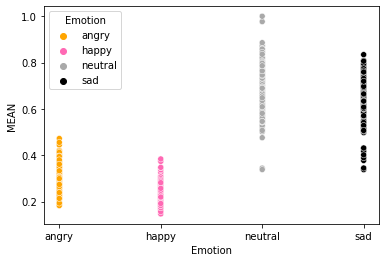

In [57]:
df = analisa_imagens("young", 200, 50, "green", 2, "up")
df_normalizado = normaliza(df)
sns.scatterplot(data=df_normalizado, x="Emotion", y="MEAN", hue="Emotion", palette=dict(angry="orange", happy="hotpink", neutral="darkgray", sad="black"));

###### **Canal Verde**

Voz: young . Processando 200 spectrogramas de cada emoção, usando o limiar de 50 , no canal de cor red , com a opção 2  no sentido: up


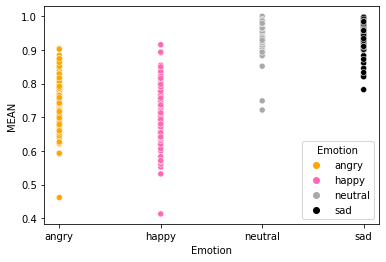

In [58]:
df = analisa_imagens("young", 200, 50, "red", 2, "up")
df_normalizado = normaliza(df)
sns.scatterplot(data=df_normalizado, x="Emotion", y="MEAN", hue="Emotion", palette=dict(angry="orange", happy="hotpink", neutral="darkgray", sad="black"));

###### **Canal Azul**

Voz: young . Processando 200 spectrogramas de cada emoção, usando o limiar de 150 , no canal de cor green , com a opção 2  no sentido: up


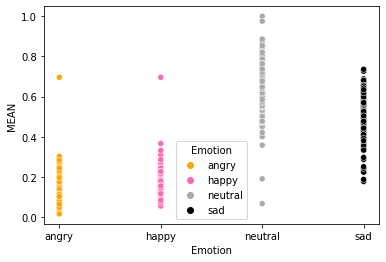

In [ ]:
df = analisa_imagens("young", 200, 150, "green", 2, "up")
df_normalizado = normaliza(df)
sns.scatterplot(data=df_normalizado, x="Emotion", y="MEAN", hue="Emotion", palette=dict(angry="orange", happy="hotpink", neutral="darkgray", sad="black"));

##### **Experimentos usando a *média* do canal de cor selecionado em função do número de níveis de cor (dentro da região R) com frequência não zero (LNZ)**

###### **Canal Vermelho  (Young x Old)**

Voz: young . Processando 200 spectrogramas de cada emoção, usando o limiar de 50 , no canal de cor red , com a opção 2  no sentido: up


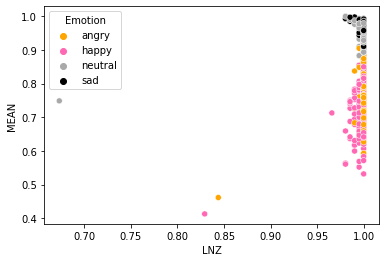

In [59]:
df = analisa_imagens("young", 200, 50, "red", 2, "up")
df_normalizado = normaliza(df)
sns.scatterplot(data=df_normalizado, x="LNZ", y="MEAN", hue="Emotion", palette=dict(angry="orange", happy="hotpink", neutral="darkgray", sad="black"));

Voz: young . Processando 200 spectrogramas de cada emoção, usando o limiar de 150 , no canal de cor green , com a opção 2  no sentido: up


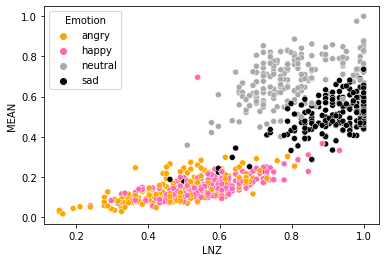

In [ ]:
df = analisa_imagens("young", 200, 150, "green", 2, "up")
df_normalizado = normaliza(df)
sns.scatterplot(data=df_normalizado, x="LNZ", y="MEAN", hue="Emotion", palette=dict(angry="orange", happy="hotpink", neutral="darkgray", sad="black"));

###### **Canal Azul (DC)**

Voz: dc . Processando 15 spectrogramas de cada emoção, usando o limiar de 100 , no canal de cor blue , com a opção 2  no sentido: up


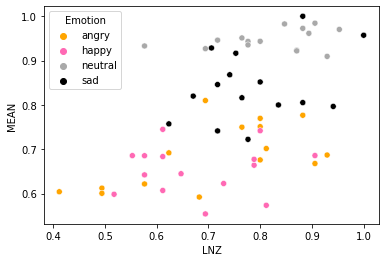

In [ ]:
df = analisa_imagens("dc", 15, 100, "blue", 2, "up")
df_normalizado = normaliza(df)
sns.scatterplot(data=df_normalizado, x="LNZ", y="MEAN", hue="Emotion", palette=dict(angry="orange", happy="hotpink", neutral="darkgray", sad="black"));

###### **Canal Verde (Young x Old)**

Voz: old . Processando 200 spectrogramas de cada emoção, usando o limiar de 150 , no canal de cor blue , com a opção 2  no sentido: up


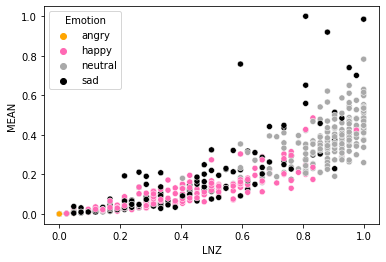

In [99]:
df = analisa_imagens("old", 200, 150, "blue", 2, "up")
df_normalizado = normaliza(df)
sns.scatterplot(data=df_normalizado, x="LNZ", y="MEAN", hue="Emotion", palette=dict(angry="orange", happy="hotpink", neutral="darkgray", sad="black"));

##### **Salva o Dataframe para um arquivo csv que será importado no Weka**

In [100]:
df_normalizado.to_csv("voice_old_blue_150_up.csv", sep=',', encoding='utf-8', index=False)

##### **Gerando Matrizes de Confusão**

###### **Canal verde, Threshold = 50**

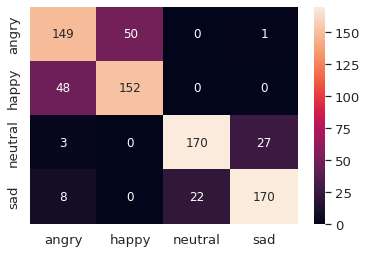

In [ ]:
array = [[149,  50,   0,   1],
         [48, 152,   0,   0],
         [3,   0, 170,  27],
         [8,   0,  22, 170]]
df_cm = pd.DataFrame(array, index=["angry", "happy", "neutral", "sad"], columns=["angry", "happy", "neutral", "sad"])
# df_cm = pd.DataFrame(array, range(4), range(4))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size

plt.show()

###### **Canal verde, Threshold = 150**

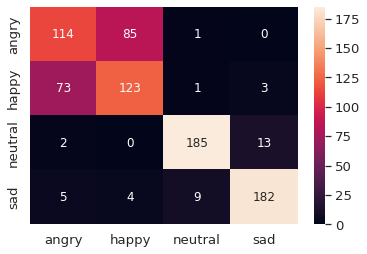

In [ ]:
array = [[114,  85,   1,   0],
         [73, 123,   1,   3],
         [2,   0, 185,  13],
         [5,   4,   9, 182]]
df_cm = pd.DataFrame(array, index=["angry", "happy", "neutral", "sad"], columns=["angry", "happy", "neutral", "sad"])
# df_cm = pd.DataFrame(array, range(4), range(4))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size

plt.show()

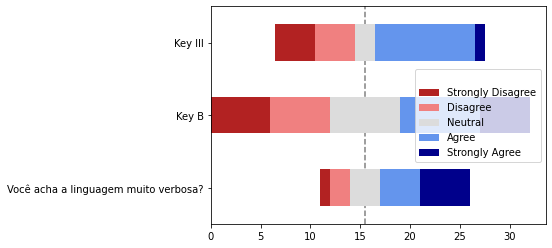

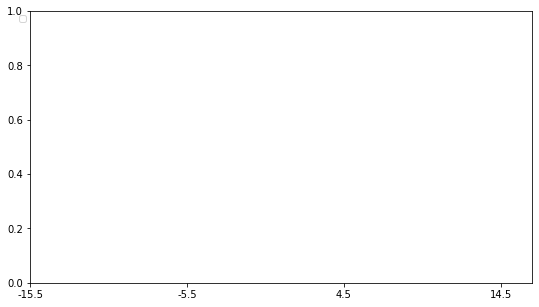

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

category_names = ['Strongly disagree', 'Disagree',
                  'Neutral', 'Agree', 'Strongly agree']

likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']

dummy = pd.DataFrame([[1,2,3,4, 5], [6,6,7,8, 5], [4, 4, 2, 10, 1]],
                     columns=["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"],
                    index=["Você acha a linguagem muito verbosa?", "Key B", "Key III"])

middles = dummy[["Strongly Disagree", "Disagree"]].sum(axis=1)+dummy["Neutral"]*.5
longest = middles.max()
complete_longest = dummy.sum(axis=1).max()
dummy.insert(0, '', (middles - longest).abs())

#horiz_offset = 1.03
#vert_offset = 1.
#dummy.plot.legend(bbox_to_anchor=(horiz_offset, vert_offset))

dummy.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=True)
z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)

fig, ax = plt.subplots(figsize=(9, 5))
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='best', fontsize='small')

plt.xlim(0, complete_longest)
xvalues = range(0,complete_longest,10)
xlabels = [str(x-longest) for x in xvalues]
plt.xticks(xvalues, xlabels)
plt.show()

In [41]:
print(longest)

15.5


[0.89888504 0.30549789 0.20676663 1.        ]
[0.99315648 0.73233372 0.42237601 1.        ]
[0.99707805 0.9987697  0.74502115 1.        ]
[0.70196078 0.87297193 0.44867359 1.        ]
[0.24805844 0.66720492 0.3502499  1.        ]


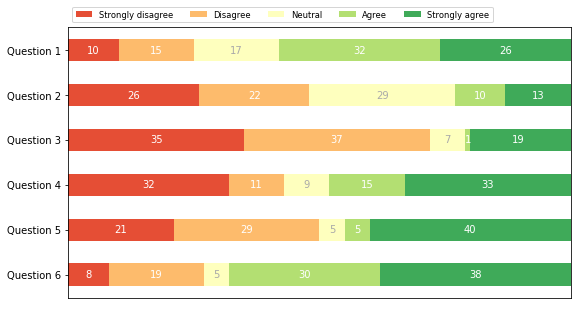

In [12]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Strongly disagree', 'Disagree',
                  'Neutral', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 1, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        print(color)
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths*2, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

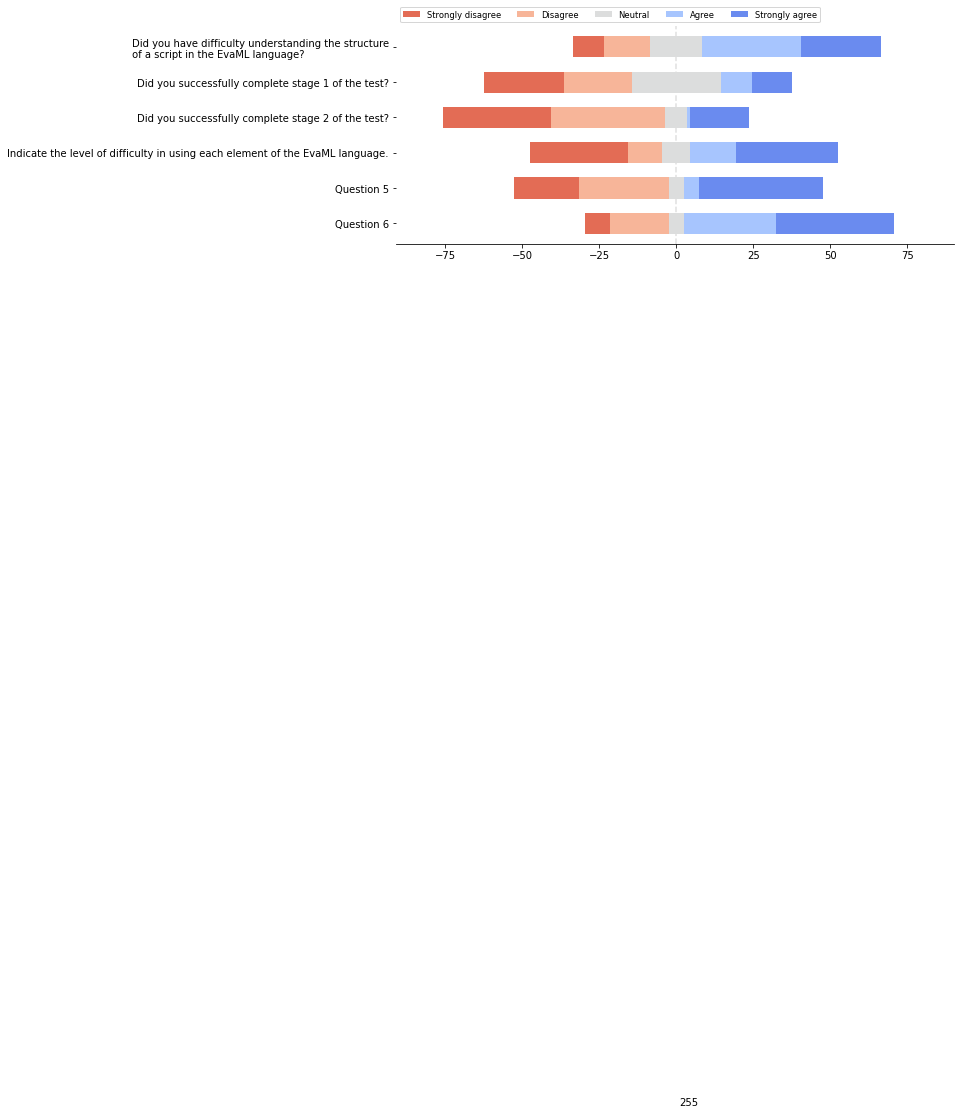

In [9]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Strongly disagree', 'Disagree',
                  'Neutral', 'Agree', 'Strongly agree']
results = {
    'Did you have difficulty understanding the structure\n of a script in the EvaML language?                           ': [10, 15, 17, 32, 26],
    'Did you successfully complete stage 1 of the test?': [26, 22, 29, 10, 13],
    'Did you successfully complete stage 2 of the test?': [35, 37, 7, 1, 19],
    'Indicate the level of difficulty in using each element of the EvaML language.': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*. The order is assumed
        to be from 'Strongly disagree' to 'Strongly agree'
    category_names : list of str
        The category labels.
    """
    
    labels = list(results.keys()) # perguntas
    data = np.array(list(results.values())) # moda para cada categoria (SD, D, N, A, SA)
    data_cum = data.cumsum(axis=1)
    middle_index = data.shape[1]//2
    offsets = data[:, range(middle_index)].sum(axis=1) + data[:, middle_index]/2
    
    # Color Mapping
    category_colors = plt.get_cmap('coolwarm_r')(
        np.linspace(0.15, 0.85, data.shape[1]))
    
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Plot Bars
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        rects = ax.barh(labels, widths, left=starts, height=0.6,
                        label=colname, color=color)
    
    # Add Zero Reference Line
    ax.axvline(0, linestyle='--', color='gray', alpha=.25, zorder=-1)
    
    # X Axis
    ax.set_xlim(-91, 90)
    #ax.set_xticks(np.arange(-90, 91, 10))
    #ax.xaxis.set_major_formatter(lambda x, pos: str(abs(int(x))))
    
    # Y Axis
    ax.invert_yaxis()
    
    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    
    # Ledgend
    ax.legend(title="grafico"ncol=len(category_names), bbox_to_anchor=(0, 1),
        loc='lower left', fontsize='small')
    
    ax.text(1,1, "255", )
    
    # Set Background Color
    fig.set_facecolor('#FFFFFF')

    return fig, ax


fig, ax = survey(results, category_names)

plt.show()